# Analysis of Housing Prices using Gradient Boosting



In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error

In [13]:
df = pd.read_csv('C:/Datasets/Melbourne_Housing/Melbourne_Housing.csv')

Preview data

In [43]:
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


In [15]:
print("Total number of entries: ", len(df))

Total number of entries:  34857


In [86]:
new_bath = df['Bathroom']
new_bed = df['Bedroom2']
new_rooms = df['Rooms']

print(len(new_bath))
print(len(new_bed))
print(len(new_rooms))

print(new_br[0:40])

NaN_Count = 0
for i in new_bath:
    if np.isnan(i) == True:
        NaN_Count += 1
print("Number of NaN in df['Bathroom']: ", NaN_Count)

NaN_Count = 0
for i in new_bed:
    if np.isnan(i) == True:
        NaN_Count += 1
print("Number of NaN in df['Bedroom2']: ", NaN_Count)

NaN_Count = 0
for i in new_rooms:
    if np.isnan(i) == True:
        NaN_Count += 1
print("Number of NaN in df['Rooms']: ", NaN_Count)

# more on column manipulation here:
# http://pytolearn.csd.auth.gr/b4-pandas/40/moddfcols.html
# more on plotting data here:
# https://towardsdatascience.com/linear-regression-using-python-ce21aa90ade6

34857
34857
34857
0     1.0
1     1.0
2     1.0
3     2.0
4     2.0
5     2.0
6     1.0
7     2.0
8     1.0
9     2.0
10    1.0
11    2.0
12    2.0
13    2.0
14    1.0
15    NaN
16    NaN
17    1.0
18    1.0
19    NaN
20    1.0
21    NaN
22    NaN
23    2.0
24    2.0
25    2.0
26    NaN
27    NaN
28    1.0
29    1.0
30    1.0
31    2.0
32    2.0
33    NaN
34    NaN
35    1.0
36    1.0
37    1.0
38    2.0
39    2.0
Name: Bathroom, dtype: float64
Number of NaN in df['Bathroom']:  8226
Number of NaN in df['Bedroom2']:  8217
Number of NaN in df['Rooms']:  0


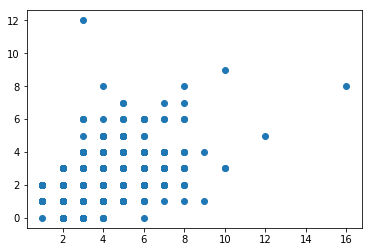

In [75]:
plt.scatter(new_rooms, new_bath)
plt.show()

More available [here](https://towardsdatascience.com/linear-regression-using-python-ce21aa90ade6)

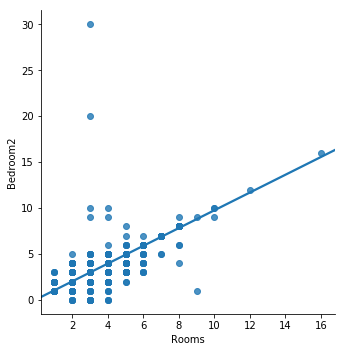

In [90]:
sns.pairplot(df, x_vars='Rooms', y_vars='Bedroom2', height=5, aspect=1.0, kind='reg')

In [67]:
df.iloc[26]

Suburb                      Abbotsford
Address                     22 Park St
Rooms                                4
Type                                 h
Price                        1.985e+06
Method                               S
SellerG                         Biggin
Date                        12/11/2016
Distance                           2.5
Postcode                          3067
Bedroom2                           NaN
Bathroom                           NaN
Car                                NaN
Landsize                           NaN
BuildingArea                       NaN
YearBuilt                          NaN
CouncilArea         Yarra City Council
Lattitude                     -37.8084
Longtitude                     144.994
Regionname       Northern Metropolitan
Propertycount                     4019
Name: 26, dtype: object

In [6]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Cleaning Data

Spelling mistakes

In [7]:
del df['Address']
del df['Method']
del df['SellerG']
del df['Date']
del df['Postcode']
del df['Lattitude']
del df['Longtitude']
del df['Regionname']
del df['Propertycount']

df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Distance', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea'],
      dtype='object')

Remove entries that are missing data
Could use median values as substitutes, but we have sufficient data without.
Important to drop coloumns before rows to preserve data.
Later can try to update bathrooms based on bedrooms.

In [8]:
print(len(df))

34857


In [33]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [34]:
print(len(df))

8895


Replace data with [one-hot encoding](https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621)

In [38]:
features_df = pd.get_dummies(df, columns = ['Suburb', 'CouncilArea', 'Type'])

In [49]:
features_df.iloc[0]

Rooms                                               2.0
Price                                         1035000.0
Distance                                            2.5
Bedroom2                                            2.0
Bathroom                                            1.0
Car                                                 0.0
Landsize                                          156.0
BuildingArea                                       79.0
YearBuilt                                        1900.0
Suburb_Abbotsford                                   1.0
Suburb_Aberfeldie                                   0.0
Suburb_Airport West                                 0.0
Suburb_Albanvale                                    0.0
Suburb_Albert Park                                  0.0
Suburb_Albion                                       0.0
Suburb_Alphington                                   0.0
Suburb_Altona                                       0.0
Suburb_Altona Meadows                           

Remove the dependent variable from the feature set

In [52]:
del features_df['Price']

KeyError: 'Price'

Create the final arrays we will use to train the algorithm.

In [53]:
X = features_df.values
Y = df['Price'].values

In [54]:
print(Y[25:50])

[ 730000.  770000.  603000.  700000.  600000.  500000.  725000.  450000.
  515000.  530000.  895000.  805000.  752000.  700000.  830000.  675000.
 1042000.  773000.  810000.  715000.  540000.  825000.  685000.  900000.
 1275000.]


Split the dataset into the training and test set.

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, shuffle=True)

In [56]:
print("Training set count: ",len(Y_train))
print("Test set count: ",len(Y_test))

Training set count:  6226
Test set count:  2669


Setup algorithm and hyperparameters
review params page 141-143 and Scikit-learn website

In [63]:
model = ensemble.GradientBoostingRegressor(n_estimators = 150, learning_rate = 0.1, max_depth = 30,
                                           min_samples_split = 4, min_samples_leaf = 6, 
                                           max_features=0.6, loss='huber')

Finally, run the model

In [64]:
model.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=30,
             max_features=0.6, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=6, min_samples_split=4,
             min_weight_fraction_leaf=0.0, n_estimators=150,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

Evaluate results

In [81]:
mse_train = mean_absolute_error(Y_train, model.predict(X_train))
mse_test = mean_absolute_error(Y_test, model.predict(X_test))

result1 = "Training set error: ${0:,.2f}"
result2 = "Test set error: ${0:,.2f}"

print(result.format(mse_train))
print(result.format(mse_test))

Training set error: $28,663.23
Training set error: $167,652.77


Evaluate causes of overfitting, including max_depth = 30 in Gradient Boosting Regressor